In [3]:
# Carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

In [12]:
# Gerando dados artificiais para o XOR
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                        X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

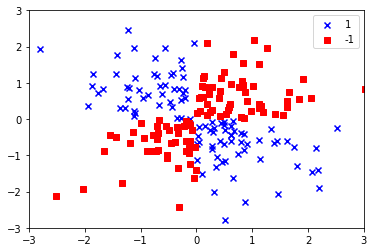

In [13]:
# Visualizando os dados XOR
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

In [6]:
#
#  Função para plotar fronteiras de decisão
#
#  Extraída do livro: Python Machine Learning do autor Sebastian Raschka. 
#
#    Entradas : X_{m, n}      = uma matriz (ou vetor) de características
#               y_{m, 1}      = um vetor de alvos em \{-1,1\}
#               p             = função de predição
#               resolution    = resolução do gráfico (cuidado valores altos dão estouro de memória)
#
#
def plot_decision_regions(X, y, p, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                              np.arange(x2_min, x2_max, resolution))

    Z = p(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

In [15]:
# Treinando um SVM linear
svm = SVC(kernel='linear', C=10, random_state=1)
svm.fit(X_xor, y_xor)

# Quantidade de Acertos
print('Acertos:',np.mean(svm.predict(X_xor)== y_xor)*100, '%')

Acertos: 63.0 %


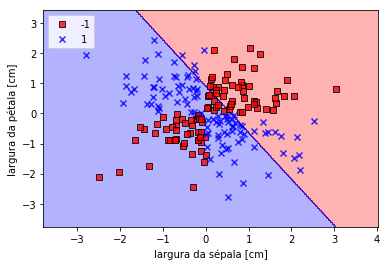

In [17]:
# Plotando a fronteira de decisão do SVM com kernel linear
plot_decision_regions(X_xor, y_xor, svm.predict)
plt.xlabel('largura da sépala [cm]')
plt.ylabel('largura da pétala [cm]')
plt.legend(loc='upper left')
plt.show()

In [19]:
# Treinando um SVM rbf
svm = SVC(kernel='rbf', C=10, random_state=1)
svm.fit(X_xor, y_xor)

# Quantidade de Acertos
print('Acertos:',np.mean(svm.predict(X_xor)== y_xor)*100, '%')

Acertos: 98.0 %


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


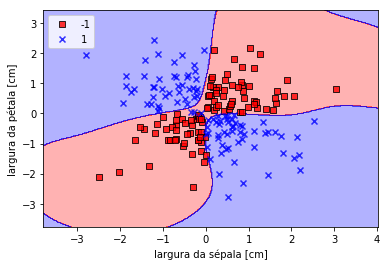

In [20]:
# Plotando a fronteira de decisão do SVM com kernel rbf
plot_decision_regions(X_xor, y_xor, svm.predict)
plt.xlabel('largura da sépala [cm]')
plt.ylabel('largura da pétala [cm]')
plt.legend(loc='upper left')
plt.show()